In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from datetime import date

In [5]:
data = pd.read_csv("us-counties.csv")

In [6]:
data = pd.DataFrame(data)
del data['fips']

In [7]:
data.head(8)

,date,county,state,cases,deaths
0,1/21/2020,Snohomish,Washington,1,0
1,1/22/2020,Snohomish,Washington,1,0
2,1/23/2020,Snohomish,Washington,1,0
3,1/24/2020,Cook,Illinois,1,0
4,1/24/2020,Snohomish,Washington,1,0
5,1/25/2020,Orange,California,1,0
6,1/25/2020,Cook,Illinois,1,0
7,1/25/2020,Snohomish,Washington,1,0


In [9]:
#Start with January datasets
data['date'] = pd.to_datetime(data['date'])

start_date = '1/21/2020'
end_date = '1/31/2020'

january_cases = (data['date'] >= start_date) & (data['date'] <= end_date)
january_cases_df = data.loc[january_cases]
january_cases_df = pd.DataFrame(january_cases_df, columns = ['date', 'county', 'state', 'cases', 'deaths'])

january_cases_df.head()

,date,county,state,cases,deaths
0,2020-01-21,Snohomish,Washington,1,0
1,2020-01-22,Snohomish,Washington,1,0
2,2020-01-23,Snohomish,Washington,1,0
3,2020-01-24,Cook,Illinois,1,0
4,2020-01-24,Snohomish,Washington,1,0


In [10]:
#Group by States and then County

#delete fips
#del january_cases_df['fips']

january_cases = january_cases_df.groupby(['state', 'county']).sum() # dont change to count 

january_cases

cases  deaths
state      county                    
Arizona    Maricopa         6       0
California Los Angeles      6       0
           Orange           7       0
           Santa Clara      1       0
Illinois   Cook            10       0
Washington Snohomish       11       0

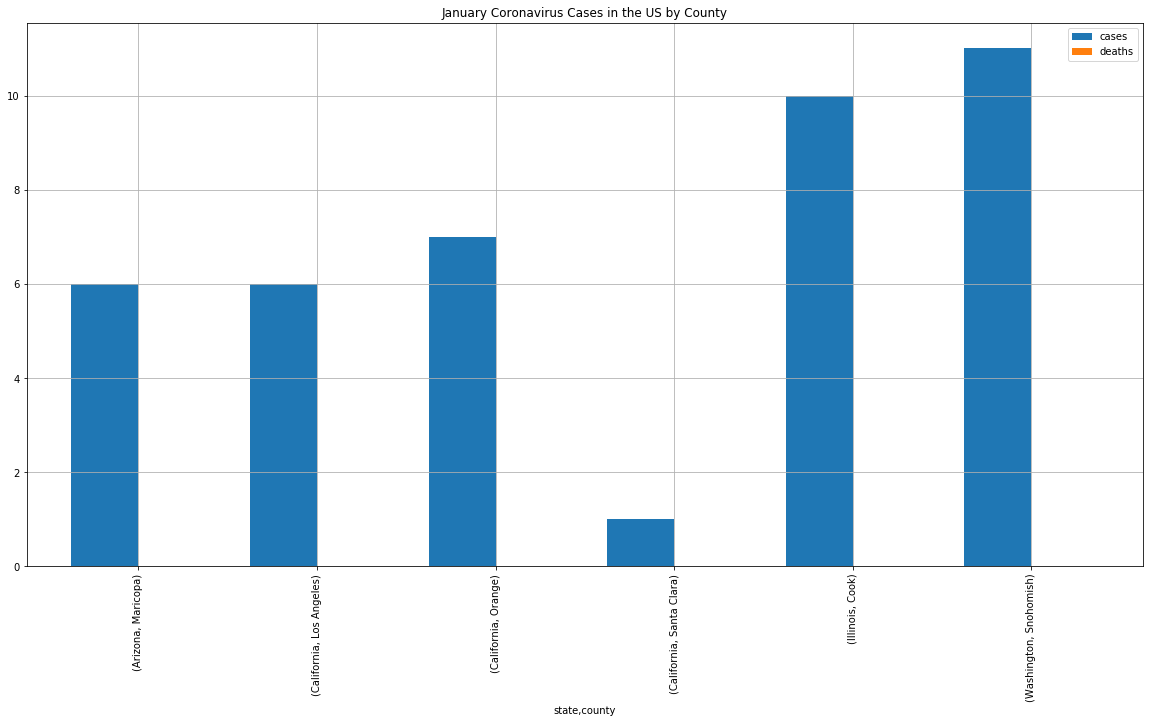

In [63]:
#Graph the cases in January only
january_cases.plot.bar(figsize = (20,10), width=0.75)

plt.title("January Coronavirus Cases in the US by County")
plt.grid()

In [102]:
#Febuary Cases 
#to see which counties had the highest recorded cases throughout the entire month

# data['date'] = pd.to_datetime(data['date'])

# febuary_start_date = '2/1/2020'
# febuary_end_date = '2/29/2020'

# febuary_cases = (data['date'] >= febuary_start_date) & (data['date'] <= febuary_end_date)
# febuary_cases_df = data.loc[febuary_cases]

#Calculating the number of cases by the end of February since the data is added over time
febuary_cases_df = pd.DataFrame(data, columns = ['date', 'county', 'state', 'cases', 'deaths'])

febuary_cases_df = febuary_cases_df[febuary_cases_df['date'] == '2020-02-29']

febuary_cases_df.head()


,date,county,state,cases,deaths
376,2020-02-29,Maricopa,Arizona,1,0
377,2020-02-29,Humboldt,California,1,0
378,2020-02-29,Los Angeles,California,1,0
379,2020-02-29,Marin,California,1,0
380,2020-02-29,Napa,California,1,0


In [103]:
febuary_cases_by_county = febuary_cases_df.groupby(['state', 'county']).sum() #changed sum to count do not do that

febuary_cases_by_county 

cases  deaths
state         county                      
Arizona       Maricopa           1       0
California    Humboldt           1       0
              Los Angeles        1       0
              Marin              1       0
              Napa               1       0
              Orange             1       0
              Sacramento         3       0
              San Diego          1       0
              San Francisco      3       0
              Santa Clara        4       0
              Solano            11       0
              Sonoma             1       0
Illinois      Cook               3       0
Massachusetts Suffolk            1       0
Nebraska      Douglas           13       0
Oregon        Washington         1       0
Texas         Bexar             11       0
Utah          Salt Lake          1       0
Washington    King               4       1
              Snohomish          2       0
              Spokane            4       0
Wisconsin     Dane               1       0

In [106]:
#Filter in the counties with over 20 cases
feb_cases_over_20 = febuary_cases_by_county[febuary_cases_by_county['cases'] >= 10]
feb_cases_over_20

,,cases,deaths
state,county,,
California,Solano,11,0
Nebraska,Douglas,13,0
Texas,Bexar,11,0


In [107]:
feb_cases_over_20_sorted = feb_cases_over_20.sort_values('cases', ascending=False )

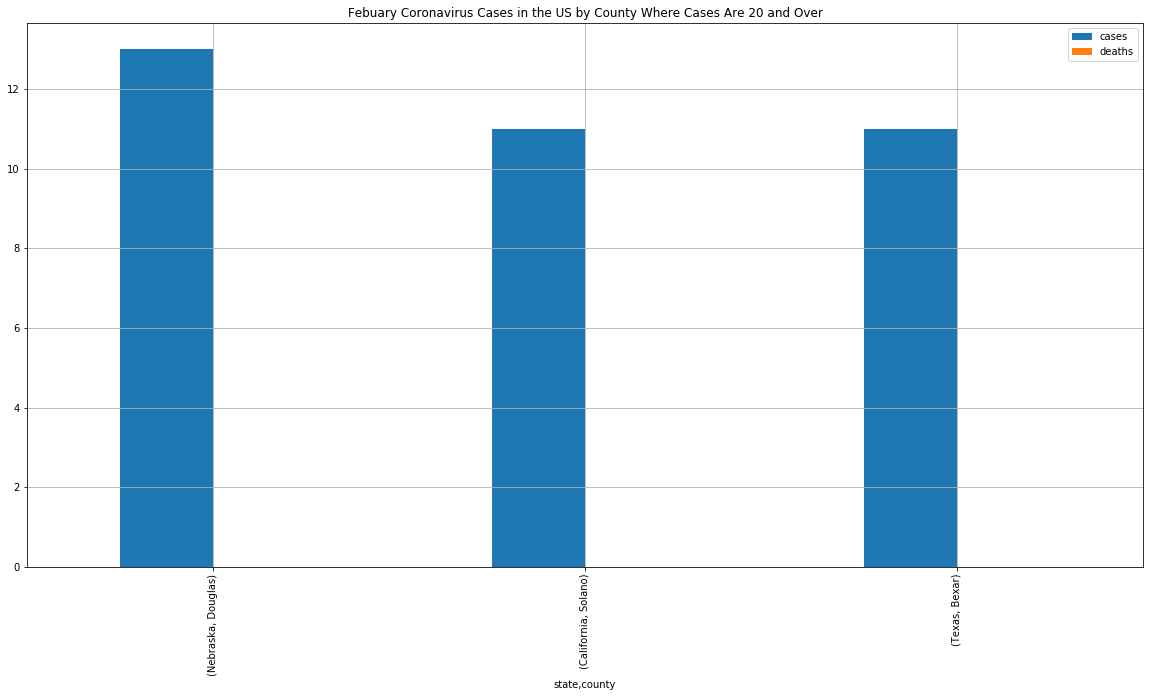

In [109]:
feb_cases_over_20_sorted.plot.bar(figsize = (20,10), width=0.5)

plt.title("Febuary Coronavirus Cases in the US by County Where Cases Are 20 and Over")
plt.grid()

In [97]:
#First week of March
#data['date'] = pd.to_datetime(data['date'])

#march_week_1_cases = data.loc[datetime.date(year=2020,month=3,day=7)]
#march_week_1_df = data.loc[march_week_1_cases]
march_week_1_df = pd.DataFrame(data, columns = ['date', 'county', 'state', 'cases', 'deaths'])

march_week_1_df = march_week_1_df[march_week_1_df['date'] == '2020-03-07']

march_week_1_df.head()



,date,county,state,cases,deaths
655,2020-03-07,Maricopa,Arizona,2,0
656,2020-03-07,Pinal,Arizona,3,0
657,2020-03-07,Alameda,California,3,0
658,2020-03-07,Contra Costa,California,4,0
659,2020-03-07,Fresno,California,1,0


In [101]:
march_week_1_county = march_week_1_df.groupby(['state', 'county']).sum()

march_week_1_county = march_week_1_county[march_week_1_county['cases'] >= 10]

march_week_1_county = march_week_1_county.sort_values('cases', ascending=False)

march_week_1_county

,,cases,deaths
state,county,,
Washington,King,72,16
New York,Westchester,69,0
California,Santa Clara,32,0
Washington,Snohomish,26,0
California,Los Angeles,14,0
Nebraska,Douglas,14,0
California,Solano,12,0
New York,New York City,12,0
California,San Francisco,11,0


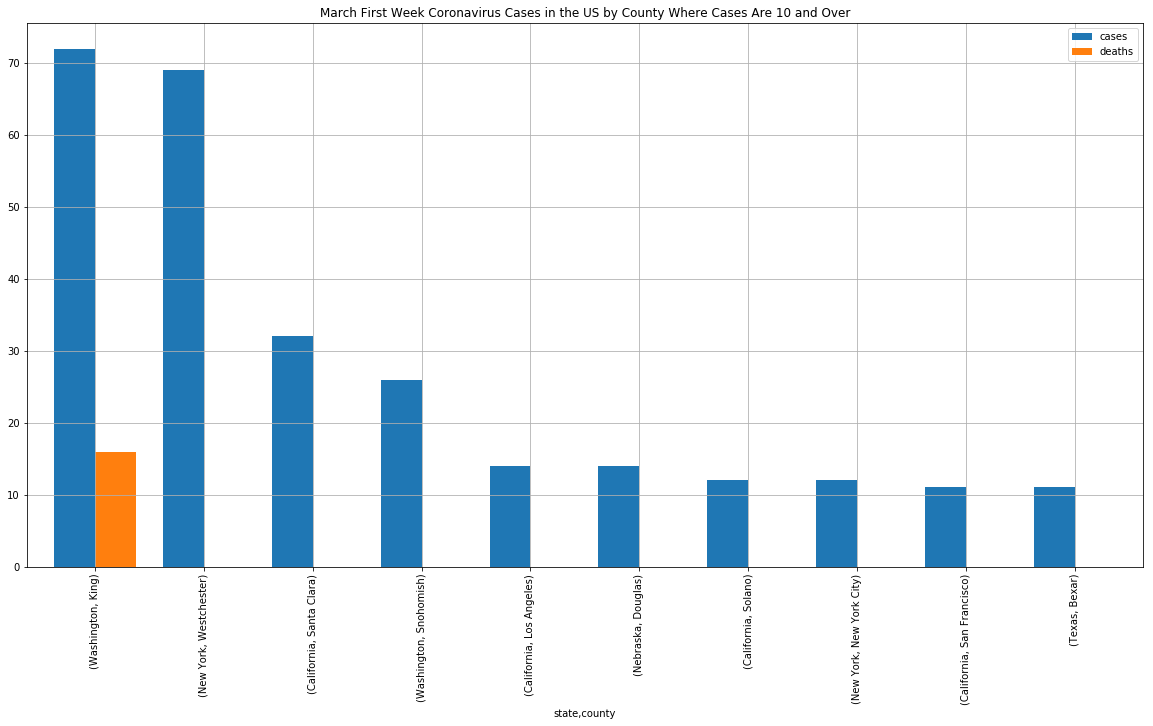

In [99]:
march_week_1_county.plot.bar(figsize = (20,10), width=0.75)

plt.title("March First Week Coronavirus Cases in the US by County Where Cases Are 10 and Over")
plt.grid()

In [111]:
#Second week of March
# data['date'] = pd.to_datetime(data['date'])

# march2_start_date = '3/8/2020'
# march2_end_date = '3/14/2020'

# march_week_2_cases = (data['date'] >= march2_start_date) & (data['date'] <= march2_end_date)
# march_week_2_df = data.loc[march_week_2_cases]  click ctrl? to comment

march_week_2_df = pd.DataFrame(data, columns = ['date', 'county', 'state', 'cases', 'deaths'])

march_week_2_df = march_week_2_df[march_week_2_df['date'] == '2020-03-14']

march_week_2_county = march_week_2_df.groupby(['state', 'county']).sum()

march_week_2_county = march_week_2_county[march_week_2_county['cases'] >= 50]

march_week_2_county


cases  deaths
state         county                      
California    Los Angeles       53       1
              Santa Clara       91       2
Illinois      Cook              51       0
Louisiana     Orleans           53       1
Massachusetts Middlesex         65       0
New York      Nassau            79       0
              New York City    269       1
              Westchester      178       0
Washington    King             389      36
              Snohomish        154       3

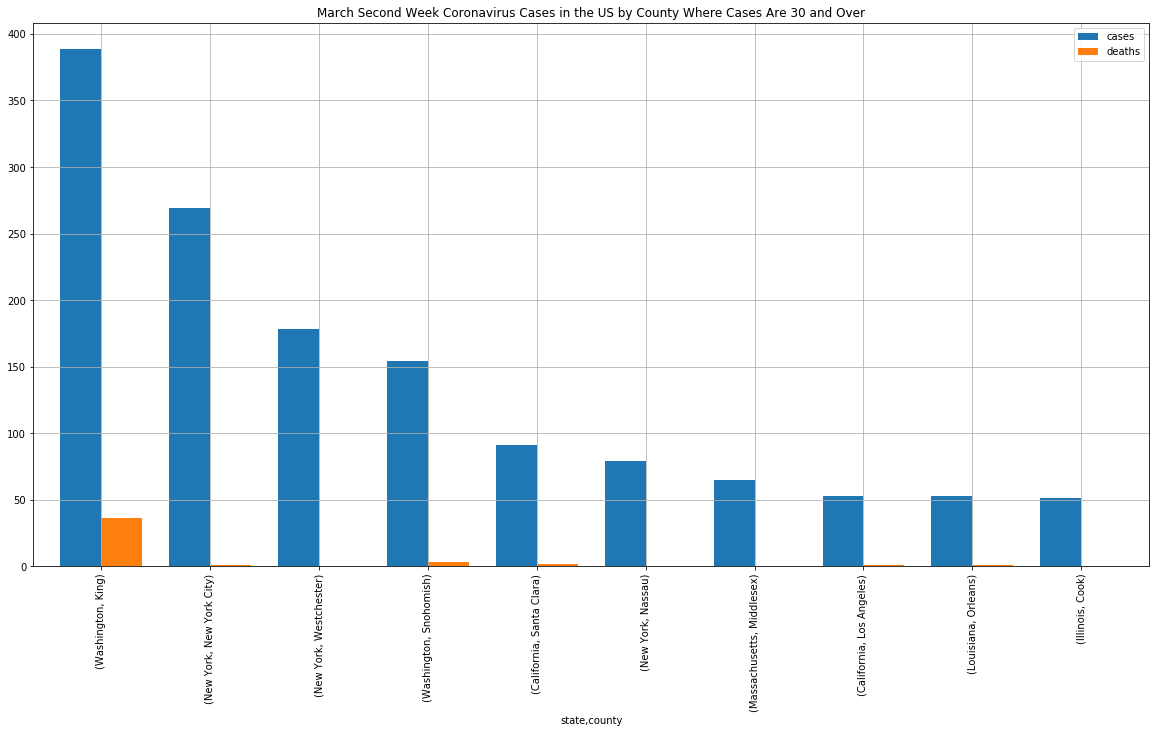

In [112]:
march_week_2_county_sort = march_week_2_county.sort_values('cases', ascending=False)

march_week_2_county_sort.plot.bar(figsize = (20,10), width=0.75)

plt.title("March Second Week Coronavirus Cases in the US by County Where Cases Are 30 and Over")
plt.grid()

In [11]:
#Third week of March
# data['date'] = pd.to_datetime(data['date'])

# march3_start_date = '3/15/2020'
# march3_end_date = '3/21/2020'

# march_week_3_cases = (data['date'] >= march3_start_date) & (data['date'] <= march3_end_date)
# march_week_3_df = data.loc[march_week_3_cases]

march_week_3_df = pd.DataFrame(data, columns = ['date', 'county', 'state', 'cases', 'deaths'])

march_week_3_df = march_week_3_df[march_week_3_df["date"] == '2020-03-21']

march_week_3_county = march_week_3_df.groupby(['state', 'county']).sum()

march_week_3_county = march_week_3_county[march_week_3_county['cases'] >= 100]

march_week_3_county = march_week_3_county[march_week_3_county['deaths'] > 5]

march_week_3_county


cases  deaths
state      county                      
California Santa Clara      263       8
Louisiana  Orleans          418      13
New Jersey Bergen           362       9
New York   Nassau          1234       7
           New York City   6211      60
           Suffolk          662       9
Washington King             935      76
           Snohomish        446       9

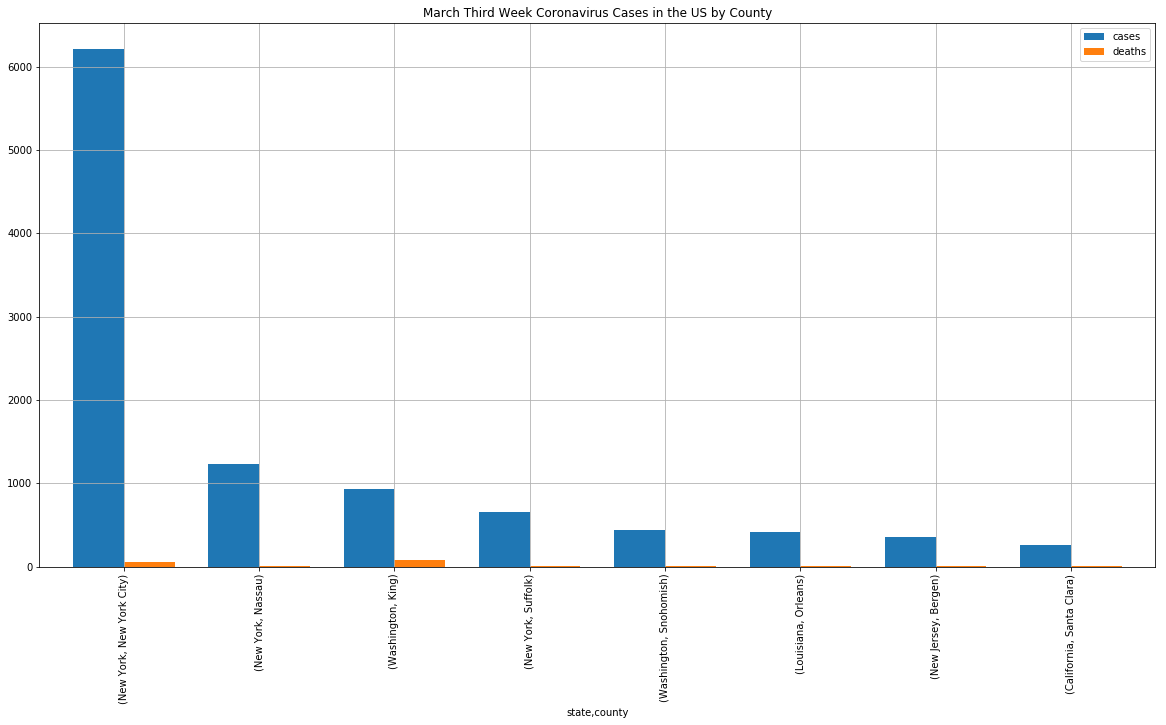

In [12]:
march_week_3_county_sort = march_week_3_county.sort_values('cases', ascending=False)

march_week_3_county_sort.plot.bar(figsize = (20,10), width=0.75)

plt.title("March Third Week Coronavirus Cases in the US by County")
plt.grid()

In [14]:
#Fourth week of March
# data['date'] = pd.to_datetime(data['date'])

# march4_start_date = '3/22/2020'
# march4_end_date = '3/28/2020'

# march_week_4_cases = (data['date'] >= march4_end_date)
# march_week_4_df = data.loc[march_week_4_cases]

march_week_4_df = pd.DataFrame(data, columns = ['date', 'county', 'state', 'cases', 'deaths'])

march_week_4_df = march_week_4_df[march_week_4_df["date"] == '2020-03-28']

march_week_4_county = march_week_4_df.groupby(['state', 'county']).sum()

march_week_4_county = march_week_4_county[march_week_4_county['cases'] >= 1000]

march_week_4_county = march_week_4_county[march_week_4_county['deaths'] > 20]

march_week_4_county



cases  deaths
state      county                      
California Los Angeles     1804      33
Illinois   Cook            2613      28
Louisiana  Orleans         1298      70
Michigan   Oakland         1018      31
           Wayne           2316      46
New Jersey Bergen          1838      35
New York   Nassau          5537      35
           New York City  30766     672
           Suffolk         4138      37
Washington King            2079     138

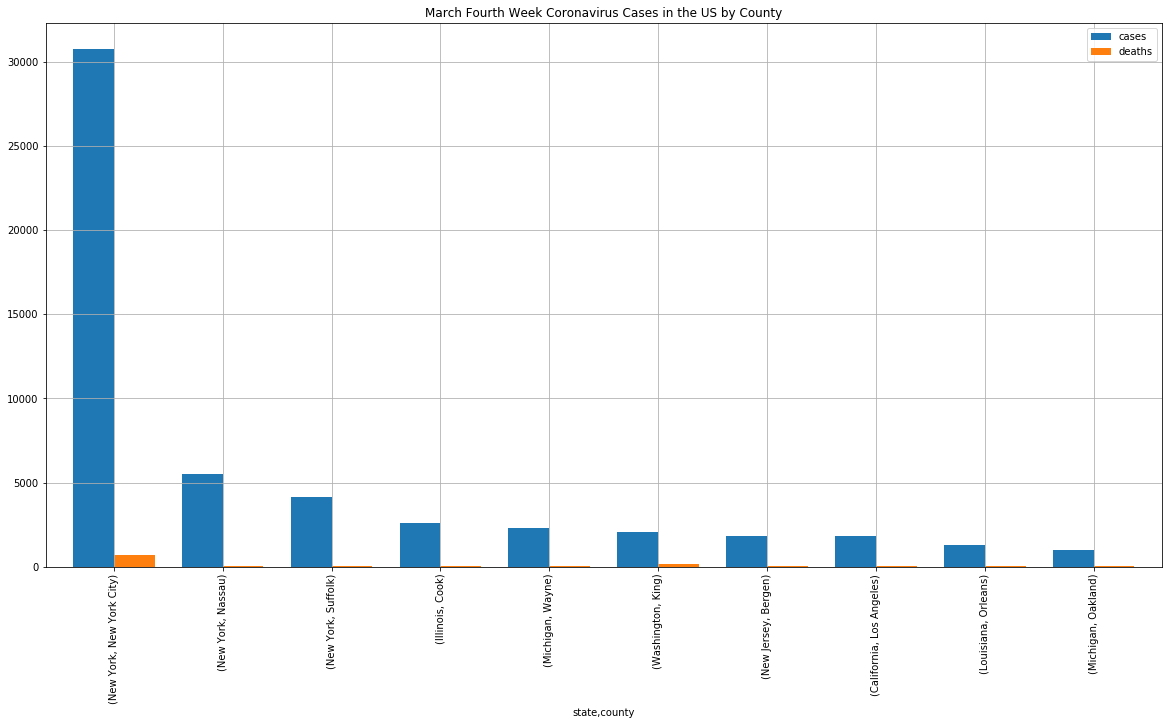

In [15]:
march_week_4_county_sort = march_week_4_county.sort_values('cases', ascending=False)

march_week_4_county_sort.plot.bar(figsize = (20,10), width=0.75)

plt.title("March Fourth Week Coronavirus Cases in the US by County")
plt.grid()

In [18]:
april_week_1_df = pd.DataFrame(data, columns = ['date', 'county', 'state', 'cases', 'deaths'])

april_week_1_df = april_week_1_df[april_week_1_df["date"] == '2020-04-04']

april_week_1_county = april_week_1_df.groupby(['state', 'county']).sum()

april_week_1_county = april_week_1_county[april_week_1_county['cases'] >= 2000]

april_week_1_county = april_week_1_county[april_week_1_county['deaths'] > 50]

april_week_1_county

cases  deaths
state       county                      
California  Los Angeles     5277     117
Connecticut Fairfield       2824      86
Illinois    Cook            7439     167
Louisiana   Jefferson       3008      95
            Orleans         3966     153
Michigan    Oakland         2785     142
            Wayne           6762     252
New Jersey  Bergen          5760     179
            Essex           3584     156
            Hudson          3491      78
            Middlesex       2578      76
            Monmouth        2065      54
            Ocean           2003      56
            Union           2916      66
New York    Nassau         13346     396
            New York City  63307    2254
            Orange          2741      51
            Rockland        4872      69
            Suffolk        12328     175
            Westchester    13080     197
Washington  King            2900     204

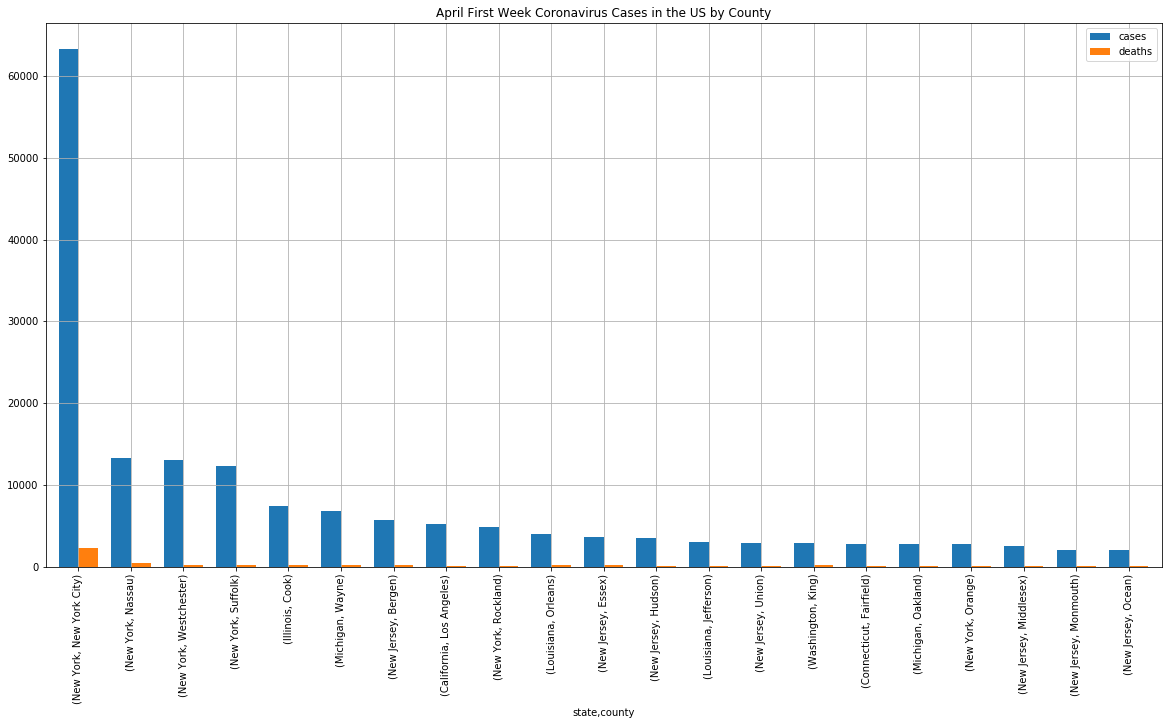

In [19]:
april_week_1_county_sort = april_week_1_county.sort_values('cases', ascending=False)

april_week_1_county_sort.plot.bar(figsize = (20,10), width=0.75)

plt.title("April First Week Coronavirus Cases in the US by County")
plt.grid()

In [ ]:
#do line graph by state next on another ipynb

#bubble chart similar to housing income appreciation mapping cases vs deaths 

#comparison from all febuary to all march and dot size can be the increase in cases over a period of time